In [3]:
%run '0.0_init_configuration.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Descargar datos 
pre_df = pd.read_csv('../../../data/interim/0.1_penguins.csv')
pre_df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


### Colecta y validación de datos

In [5]:
# ¿Qué tipo de dato son las variables del conjunto de datos?
pre_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
#¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?
pre_df.dtypes.value_counts()


float64    4
object     3
int64      1
Name: count, dtype: int64

In [7]:
#¿Cuántas variables y observaciones tenemos en el conjunto de datos?
pre_df.shape

(344, 8)

In [9]:
#¿Existen valores nulos explicitos en el conjunto de datos?
pre_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [11]:
# ¿De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?
pre_df.isnull().sum().sort_values(ascending=False)

sex                  11
bill_depth_mm         2
flipper_length_mm     2
bill_length_mm        2
body_mass_g           2
island                0
species               0
year                  0
dtype: int64

In [13]:
#¿Cuántos valores nulos tenemos en total en el conjunto de datos?
pre_df.isnull().sum().sum()

np.int64(19)

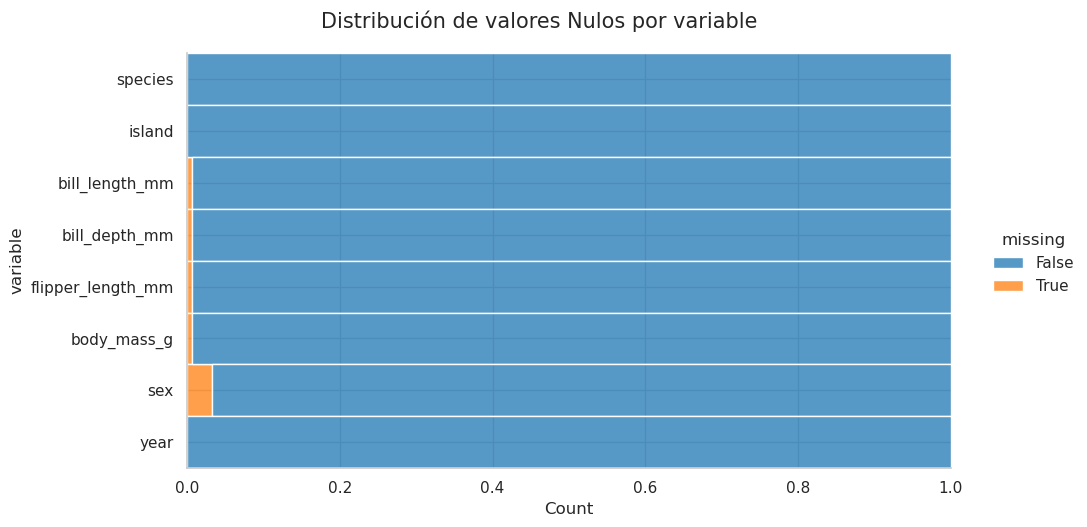

In [ ]:
#Graficamos valores nulos
# creamos una columna con melt() para valores faltanes
g = (pre_df
 .isnull()
 # creamos una columna con melt() para valores faltanes
 .melt(value_name='missing')
# Usamos la funcion pipe() para usar sns y aplicar a toda la tabla
.pipe( lambda pre_df : (sns.displot(data=pre_df,
                             y='variable',
                             hue='missing',
                             multiple='fill',
                             aspect=2)))
)

# Ya que usamos pipe para crear un gráfico, usamos .figure para dar titulo.
g.figure.suptitle("Distribución de valores Nulos por variable", fontsize=15, y=1.05)
plt.show()

In [29]:
#¿Cuántas observaciones perdemos si eliminamos los datos faltantes?
df_prueba = pre_df.dropna()
df_prueba.shape

(333, 8)

In [30]:
#Guardamos los datos procesados
df = pre_df.dropna()
df.to_csv('../../../data/processed/datos_procesados_penguins.csv', index=False)